# SECTION 0: IMPORTS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import time
import shap

C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
from skopt import BayesSearchCV
from skopt import space
from sklearn.model_selection import GridSearchCV
from skopt.space import Real, Categorical, Integer

In [3]:
from pyforest import*
lazy_imports()

['import imutils',
 'import statsmodels.api as sm',
 'import plotly.express as px',
 'import lightgbm as lgb',
 'import sklearn',
 'from sklearn.model_selection import KFold',
 'import cv2',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import pickle',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from xlrd import open_workbook',
 'from sklearn.linear_model import Ridge',
 'import tqdm',
 'from dask import dataframe as dd',
 'import textblob',
 'from sklearn.model_selection import GridSearchCV',
 'from pathlib import Path',
 'import sys',
 'import xgboost as xgb',
 'import random',
 'import awswrangler as wr',
 'import numpy as np',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.manifold import TSNE',
 'from sklearn.cluster import KMeans',
 'from scipy import stats',
 'from sklearn.model_selection import StratifiedKFold',
 'import fastai',
 'import tensorflow as tf',
 'import matplotlib as mpl',
 'from openpyxl import load_workbook'

# SECTION 1: DATA LOADING

In [4]:
df = pd.read_csv("C:/Users/lucar/Documents/My Documents/03 Uni/02 Bath/02 AIML/Concrete Project/Code/Concrete_Data_1.csv")
df.head()

<IPython.core.display.Javascript object>

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})
df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age', 'strength']
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [6]:
df.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarseagg           float64
fineagg             float64
age                   int64
strength            float64
dtype: object

In [7]:
#checking for missing values
df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

In [8]:
stats = df.describe().T
stats['mode'] = df.mode().iloc[0]

stats = stats.round(2)
stats = stats[['count', 'mean', 'std', 'min', '50%', 'max', 'mode']]
stats.columns = ['Count', 'Mean', 'Std Dev', 'Min', 'Median', 'Max', 'Mode']
stats.index.name = 'Feature'

print(stats.to_string())


                   Count    Mean  Std Dev     Min  Median     Max   Mode
Feature                                                                 
cement            1030.0  281.17   104.51  102.00  272.90   540.0  362.6
slag              1030.0   73.90    86.28    0.00   22.00   359.4    0.0
ash               1030.0   54.19    64.00    0.00    0.00   200.1    0.0
water             1030.0  181.57    21.35  121.80  185.00   247.0  192.0
superplasticizer  1030.0    6.20     5.97    0.00    6.40    32.2    0.0
coarseagg         1030.0  972.92    77.75  801.00  968.00  1145.0  932.0
fineagg           1030.0  773.58    80.18  594.00  779.50   992.6  594.0
age               1030.0   45.66    63.17    1.00   28.00   365.0   28.0
strength          1030.0   35.82    16.71    2.33   34.44    82.6   33.4


In [9]:
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

duplicate_rows = df[df.duplicated()]
print(duplicate_rows)

Number of duplicate rows: 25
     cement   slag  ash  water  superplasticizer  coarseagg  fineagg  age  \
77    425.0  106.3  0.0  153.5              16.5      852.1    887.1    3   
80    425.0  106.3  0.0  153.5              16.5      852.1    887.1    3   
86    362.6  189.0  0.0  164.9              11.6      944.7    755.8    3   
88    362.6  189.0  0.0  164.9              11.6      944.7    755.8    3   
91    362.6  189.0  0.0  164.9              11.6      944.7    755.8    3   
100   425.0  106.3  0.0  153.5              16.5      852.1    887.1    7   
103   425.0  106.3  0.0  153.5              16.5      852.1    887.1    7   
109   362.6  189.0  0.0  164.9              11.6      944.7    755.8    7   
111   362.6  189.0  0.0  164.9              11.6      944.7    755.8    7   
123   425.0  106.3  0.0  153.5              16.5      852.1    887.1   28   
126   425.0  106.3  0.0  153.5              16.5      852.1    887.1   28   
132   362.6  189.0  0.0  164.9              11.

# SECTION 2: PEARSON CORRELATIONS & EDA

# (On original data with outliers)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

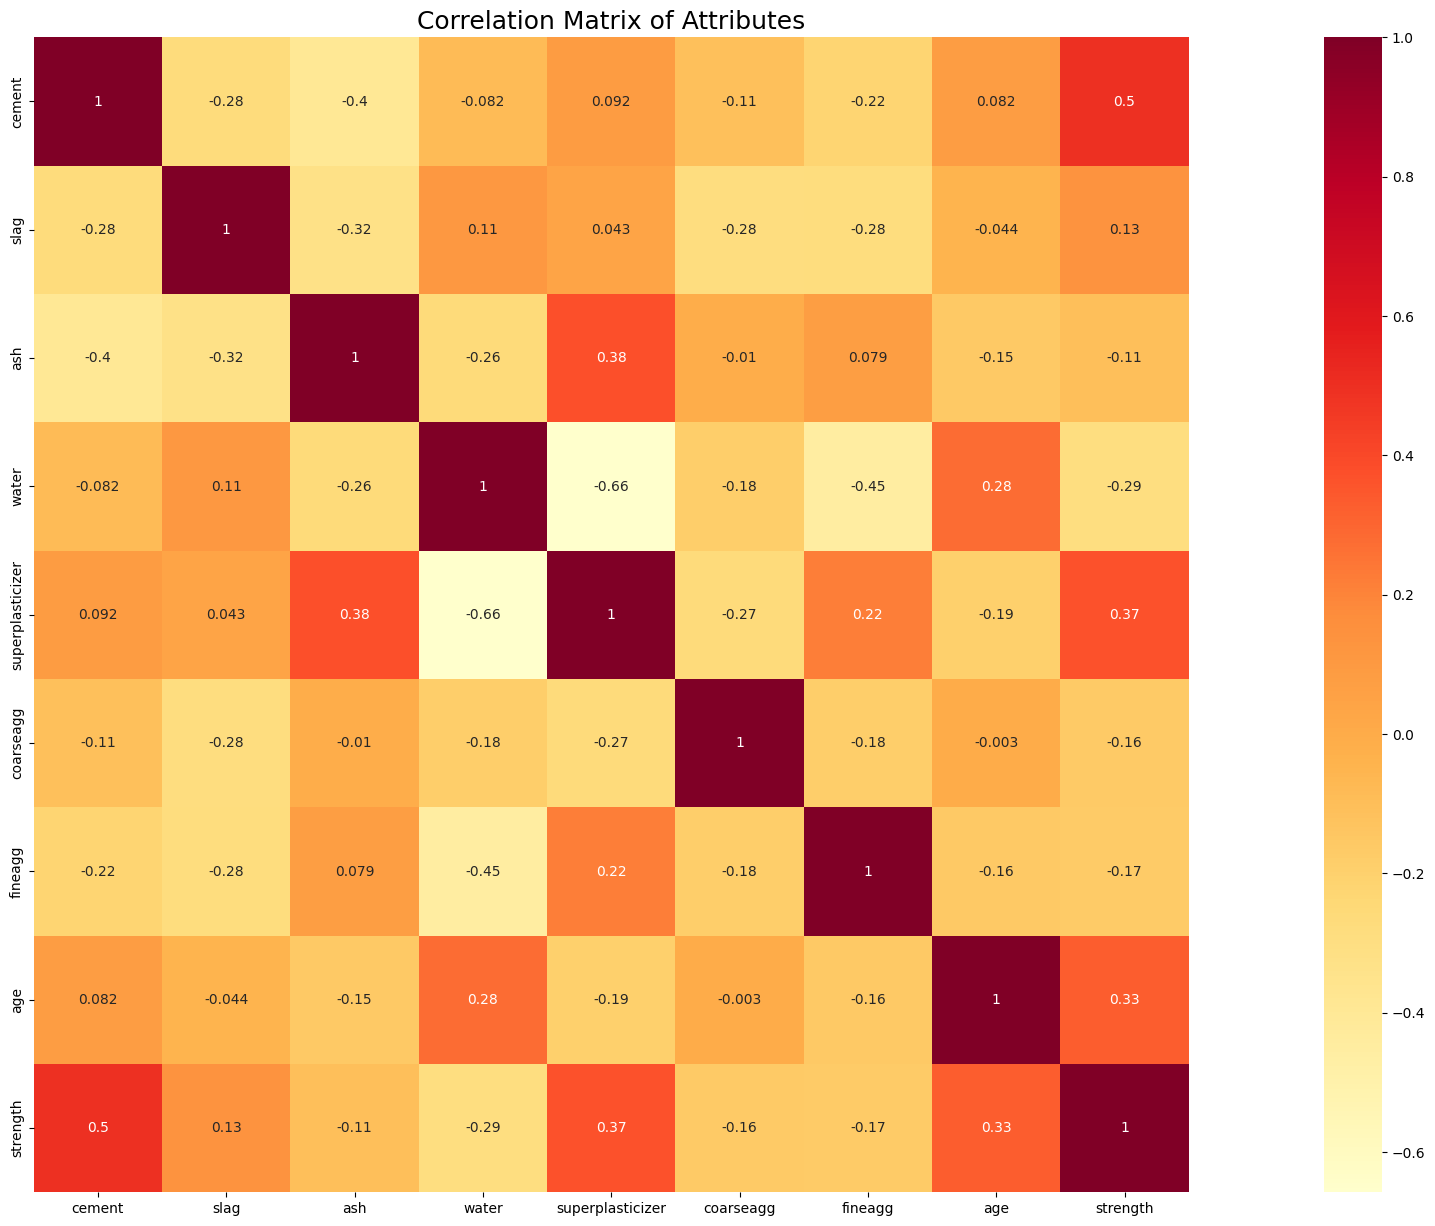

In [10]:
plt.figure(figsize=(35,15))

sns.heatmap(df.corr(),vmax=1, square=True, annot=True, cmap='YlOrRd')
plt.title('Correlation Matrix of Attributes', fontsize=18)
plt.savefig('pearson_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# SECTION 3: OUTLIER DETECTION (For SVR only)

In [11]:
def detect_outliers_zscore(df, features, threshold=3, method='zscore'):
    outlier_mask = pd.Series(True, index=df.index)
    outlier_summary = {}
    
    for feature in features:
        if method == 'zscore':
            z_scores = np.abs((df[feature] - df[feature].mean()) / df[feature].std())
            outlier_count = (z_scores > threshold).sum()
        elif method == 'iqr':
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1
            outlier_count = ((df[feature] < Q1 - 1.5 * IQR) | 
                           (df[feature] > Q3 + 1.5 * IQR)).sum()
        
        outlier_summary[feature] = outlier_count
        outlier_mask = outlier_mask & (z_scores <= threshold)
    
    return outlier_mask, outlier_summary

# Use the function
raw_features = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 
                'coarseagg', 'fineagg', 'age', 'strength']

outlier_mask, outlier_summary = detect_outliers_zscore(
    df, raw_features, threshold=3, method='zscore'
)

# Print results neatly
print("OUTLIER DETECTION SUMMARY (Z-score method, threshold = 3 SD)")
for feature, count in outlier_summary.items():
    pct = count / len(df) * 100
    print(f"  {feature:25s}: {count:3d} outliers ({pct:5.2f}%)")

print(f"\n{"Total samples with outliers":25s}: {(~outlier_mask).sum()}")
print(f"{"Clean samples":25s}: {outlier_mask.sum()} ({outlier_mask.sum()/len(df)*100:.2f}%)")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

OUTLIER DETECTION SUMMARY (Z-score method, threshold = 3 SD)
  cement                   :   0 outliers ( 0.00%)
  slag                     :   4 outliers ( 0.39%)
  ash                      :   0 outliers ( 0.00%)
  water                    :   2 outliers ( 0.19%)
  superplasticizer         :  10 outliers ( 0.97%)
  coarseagg                :   0 outliers ( 0.00%)
  fineagg                  :   0 outliers ( 0.00%)
  age                      :  33 outliers ( 3.20%)
  strength                 :   0 outliers ( 0.00%)

Total samples with outliers: 49
Clean samples            : 981 (95.24%)


# SECTION 4: FEATURE ENGINEERING (Apply to both datasets)
# Add ratios and age bins to BOTH X (with outliers) and X_clean (without)

In [12]:
df_engineered = df.copy()

df_engineered['water_cement_ratio'] = df['water'] / df['cement']
#df_engineered['slag_cement_ratio'] = df['slag'] / df['cement']
#df_engineered['ash_cement_ratio'] = df['ash'] / df['cement']
#df_engineered['aggregate_cement_ratio'] = (df['coarseagg'] + df['fineagg']) / df['cement']
#df_engineered['superplasticizer_cement_ratio'] = df['superplasticizer'] / df['cement']
#df_engineered['coarse_fine_agg_ratio'] = df['coarseagg'] / (df['fineagg'] + 1e-10)
df_engineered['binder_total'] = df['cement'] + df['slag'] + df['ash']
#df_engineered['ash_binder_ratio'] = df['ash'] / (df_engineered['binder_total'] + 1e-10)

# AGE BINNING (4 bins optimized for your data distribution)
# Ordinal binning capturing concrete hydration phases
# Based on actual data: 1-7d (262), 8-28d (487), 29-90d (145), 91-365d (136)
bins = [0, 7, 28, 90, 365]
labels_desc = ['early_cure', 'accelerated_gain', 'strength_plateau', 'long_term']

df_engineered['age_bin'] = pd.cut(df_engineered['age'], bins=bins, labels=[0, 1, 2, 3], include_lowest=True).astype(int)

# Domain-critical binary indicators
df_engineered['is_early_hydration'] = (df_engineered['age'] <= 7).astype(int)    # 262 samples - rapid hydration phase
df_engineered['is_28day_standard'] = (df_engineered['age'] == 28).astype(int)    # 425 samples - ACI standard testing age
df_engineered['is_matured'] = (df_engineered['age'] >= 28).astype(int)           # 614 samples - strength plateau phase

# ZERO-INFLATED FEATURES

df_engineered['has_slag'] = (df_engineered['slag'] > 0).astype(int)
df_engineered['has_ash'] = (df_engineered['ash'] > 0).astype(int)
df_engineered['has_superplasticizer'] = (df_engineered['superplasticizer'] > 0).astype(int)

print(f"\nEngineered Features Summary:")
print(f"  Original features: {df.shape[1]}")
print(f"  New features added: {df_engineered.shape[1] - df.shape[1]}")
print(f"  Total features: {df_engineered.shape[1]}")
print(f"\nAge bin distribution:")
print(df_engineered['age_bin'].value_counts().sort_index())

<IPython.core.display.Javascript object>


Engineered Features Summary:
  Original features: 9
  New features added: 9
  Total features: 18

Age bin distribution:
age_bin
0    262
1    487
2    145
3    136
Name: count, dtype: int64


# SECTION 5: CREATE TWO DATASETS USING outlier_mask

In [13]:
print("CREATING TWO DATASETS: WITH & WITHOUT OUTLIERS")

# DATASET 1: WITH OUTLIERS (for tree-based models)
# Drop compressive_strength to create X, keep y separate
X_with_outliers = df_engineered.drop('strength', axis=1)
y_with_outliers = df_engineered['strength']

print(f"\nDataset 1 - WITH OUTLIERS (for tree-based models):")
print(f"  Total samples: {len(X_with_outliers)}")
print(f"  Features: {X_with_outliers.shape[1]}")

# DATASET 2: WITHOUT OUTLIERS (for SVR)
# Use outlier_mask to filter
df_clean = df_engineered[outlier_mask].copy()
X_without_outliers = df_clean.drop('strength', axis=1)
y_without_outliers = df_clean['strength']

print(f"\nDataset 2 - WITHOUT OUTLIERS (for SVR):")
print(f"  Clean samples: {len(X_without_outliers)}")
print(f"  Features: {X_without_outliers.shape[1]}")
print(f"  Outliers removed: {len(X_with_outliers) - len(X_without_outliers)}")

CREATING TWO DATASETS: WITH & WITHOUT OUTLIERS

Dataset 1 - WITH OUTLIERS (for tree-based models):
  Total samples: 1030
  Features: 17

Dataset 2 - WITHOUT OUTLIERS (for SVR):
  Clean samples: 981
  Features: 17
  Outliers removed: 49


# SECTION 6.1: CREATE THREE-WAY SPLITS, TRAIN/VAL/TEST

In [14]:
# DATASET 1: WITH OUTLIERS (for Tree-based models)
print("Dataset 1: THREE-WAY SPLIT WITH OUTLIERS (Random Forest & XGBoost)")

# First split: 80% train+val, 20% test
X_temp_with, X_test_with, y_temp_with, y_test_with = train_test_split(X_with_outliers, y_with_outliers, test_size=0.2, random_state=42)

# Second split: 75% train, 25% validation (of the 70%)
X_train_with, X_val_with, y_train_with, y_val_with = train_test_split(X_temp_with, y_temp_with, test_size=0.25, random_state=42)

print(f"Train set: {X_train_with.shape[0]} samples (60%)")
print(f"Val set:   {X_val_with.shape[0]} samples (20%)")
print(f"Test set:  {X_test_with.shape[0]} samples (20%)")

# DATASET 2: WITHOUT OUTLIERS (for SVR)
print("\nDataset 2: THREE-WAY SPLIT WITHOUT OUTLIERS (SVR)")

# First split: 80% train+val, 20% test
X_temp_clean, X_test_clean, y_temp_clean, y_test_clean = train_test_split(X_without_outliers, y_without_outliers, test_size=0.2, random_state=42)

# Second split: 75% train, 25% validation
X_train_clean, X_val_clean, y_train_clean, y_val_clean = train_test_split(X_temp_clean, y_temp_clean, test_size=0.25, random_state=42)

print(f"Train set: {X_train_clean.shape[0]} samples (60%)")
print(f"Val set:   {X_val_clean.shape[0]} samples (20%)")
print(f"Test set:  {X_test_clean.shape[0]} samples (20%)")

Dataset 1: THREE-WAY SPLIT WITH OUTLIERS (Random Forest & XGBoost)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train set: 618 samples (60%)
Val set:   206 samples (20%)
Test set:  206 samples (20%)

Dataset 2: THREE-WAY SPLIT WITHOUT OUTLIERS (SVR)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train set: 588 samples (60%)
Val set:   196 samples (20%)
Test set:  197 samples (20%)


# SECTION 6.2: NORMALIZE ALL DATA

In [15]:
# Create scalers for both datasets
scaler_with = StandardScaler()
scaler_clean = StandardScaler()

# Fit and transform WITH OUTLIERS dataset
X_train_with = scaler_with.fit_transform(X_train_with)
X_val_with = scaler_with.transform(X_val_with)
X_test_with = scaler_with.transform(X_test_with)

# Fit and transform CLEAN dataset
X_train_clean = scaler_clean.fit_transform(X_train_clean)
X_val_clean = scaler_clean.transform(X_val_clean)
X_test_clean = scaler_clean.transform(X_test_clean)

print(" All datasets normalized with StandardScaler")
print(f"  • WITH outliers: {X_train_with.shape[1]} features standardized")
print(f"  • CLEAN dataset: {X_train_clean.shape[1]} features standardized")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

 All datasets normalized with StandardScaler
  • WITH outliers: 17 features standardized
  • CLEAN dataset: 17 features standardized


# SECTION 7: RANDOM FOREST - BAYESIAN OPTIMIZATION (WITH OUTLIERS)

In [16]:
rf_base = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# Define search space using skopt space classes
search_space_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Bayesian Optimization
print("\nPerforming Bayesian Optimization (Random Forest)...")
start_time = time.time()

bayes_search_rf = BayesSearchCV(
    estimator=rf_base,
    search_spaces=search_space_rf,
    n_iter=40,              # match XGBoost (40 iterations)
    cv=5,                   # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search_rf.fit(X_train_with, y_train_with)

elapsed_time = time.time() - start_time

# Print results
print("Random Forest - Bayesian Optimization Results")
print(f"\nBest Parameters Found:")
print(f"  n_estimators: {bayes_search_rf.best_params_['n_estimators']}")
print(f"  max_depth: {bayes_search_rf.best_params_['max_depth']}")
print(f"  min_samples_split: {bayes_search_rf.best_params_['min_samples_split']}")
print(f"  min_samples_leaf: {bayes_search_rf.best_params_['min_samples_leaf']}")

print(f"\nBest CV R² Score: {bayes_search_rf.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Get best model
best_rf = bayes_search_rf.best_estimator_

# Make predictions
print("\nMaking predictions...")
rf_train_pred = best_rf.predict(X_train_with)
rf_val_pred = best_rf.predict(X_val_with)
rf_test_pred = best_rf.predict(X_test_with)

# Metrics
rf_train_rmse = np.sqrt(mean_squared_error(y_train_with, rf_train_pred))
rf_train_mae = mean_absolute_error(y_train_with, rf_train_pred)
rf_train_r2 = r2_score(y_train_with, rf_train_pred)

rf_val_rmse = np.sqrt(mean_squared_error(y_val_with, rf_val_pred))
rf_val_mae = mean_absolute_error(y_val_with, rf_val_pred)
rf_val_r2 = r2_score(y_val_with, rf_val_pred)

rf_test_rmse = np.sqrt(mean_squared_error(y_test_with, rf_test_pred))
rf_test_mae = mean_absolute_error(y_test_with, rf_test_pred)
rf_test_r2 = r2_score(y_test_with, rf_test_pred)

print("Random Forest Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {rf_train_rmse:.4f} MPa")
print(f"  MAE:  {rf_train_mae:.4f} MPa")
print(f"  R²:   {rf_train_r2:.4f}")

print(f"\nValidation Set:")
print(f"  RMSE: {rf_val_rmse:.4f} MPa")
print(f"  MAE:  {rf_val_mae:.4f} MPa")
print(f"  R²:   {rf_val_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {rf_test_rmse:.4f} MPa")
print(f"  MAE:  {rf_test_mae:.4f} MPa")
print(f"  R²:   {rf_test_r2:.4f}")

<IPython.core.display.Javascript object>


Performing Bayesian Optimization (Random Forest)...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fit

C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(35), np.int64(1), np.int64(2), np.int64(300)] before, using random point [40, 1, 2, 200]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), np.int64(1), np.int64(2), np.int64(300)] before, using random point [35, 2, 5, 300]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), np.int64(1), np.int64(2), np.int64(300)] before, using random point [30, 4, 10, 300]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


C:\Users\lucar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\skopt\optimizer\optimizer.py:517: UserWarning: The objective has been evaluated at point [np.int64(30), np.int64(1), np.int64(2), np.int64(300)] before, using random point [25, 2, 5, 200]
  warnings.warn(


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Random Forest - Bayesian Optimization Results

Best Parameters Found:
  n_estimators: 300
  max_depth: 35
  min_samples_split: 2
  min_samples_leaf: 1

Best CV R² Score: 0.8877
Search Time: 2.33 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest Performance

Training Set:
  RMSE: 2.0967 MPa
  MAE:  1.3775 MPa
  R²:   0.9841

Validation Set:
  RMSE: 5.2488 MPa
  MAE:  3.1996 MPa
  R²:   0.9097

Test Set:
  RMSE: 5.3154 MPa
  MAE:  3.7099 MPa
  R²:   0.8904


In [17]:
rf_base_grid = RandomForestRegressor(
    random_state=42,
    n_jobs=-1
)

# Define parameter grid
# (Grid Search uses lists [], not skopt classes)
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [20, 25, 30, 35, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Grid Search
print("\nPerforming Grid Search Optimization (Random Forest)...")
start_time = time.time()

grid_search_rf = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid_rf,
    cv=5,                   # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train_with, y_train_with)

elapsed_time = time.time() - start_time

# Print results
print("Random Forest - Grid Search Optimization Results")
print(f"\nBest Parameters Found:")
print(f"  n_estimators: {grid_search_rf.best_params_['n_estimators']}")
print(f"  max_depth: {grid_search_rf.best_params_['max_depth']}")
print(f"  min_samples_split: {grid_search_rf.best_params_['min_samples_split']}")
print(f"  min_samples_leaf: {grid_search_rf.best_params_['min_samples_leaf']}")

print(f"\nBest CV R² Score: {grid_search_rf.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Get best model
best_rf_grid = grid_search_rf.best_estimator_

# Make predictions
print("\nMaking predictions...")
rf_train_pred_grid = best_rf_grid.predict(X_train_with)
rf_val_pred_grid = best_rf_grid.predict(X_val_with)
rf_test_pred_grid = best_rf_grid.predict(X_test_with)

# Metrics
rf_train_rmse_grid = np.sqrt(mean_squared_error(y_train_with, rf_train_pred_grid))
rf_train_mae_grid = mean_absolute_error(y_train_with, rf_train_pred_grid)
rf_train_r2_grid = r2_score(y_train_with, rf_train_pred_grid)

rf_val_rmse_grid = np.sqrt(mean_squared_error(y_val_with, rf_val_pred_grid))
rf_val_mae_grid = mean_absolute_error(y_val_with, rf_val_pred_grid)
rf_val_r2_grid = r2_score(y_val_with, rf_val_pred_grid)

rf_test_rmse_grid = np.sqrt(mean_squared_error(y_test_with, rf_test_pred_grid))
rf_test_mae_grid = mean_absolute_error(y_test_with, rf_test_pred_grid)
rf_test_r2_grid = r2_score(y_test_with, rf_test_pred_grid)

print("Random Forest Performance (Grid Search)")
print(f"\nTraining Set:")
print(f"  RMSE: {rf_train_rmse_grid:.4f} MPa")
print(f"  MAE:  {rf_train_mae_grid:.4f} MPa")
print(f"  R²:   {rf_train_r2_grid:.4f}")

print(f"\nValidation Set:")
print(f"  RMSE: {rf_val_rmse_grid:.4f} MPa")
print(f"  MAE:  {rf_val_mae_grid:.4f} MPa")
print(f"  R²:   {rf_val_r2_grid:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {rf_test_rmse_grid:.4f} MPa")
print(f"  MAE:  {rf_test_mae_grid:.4f} MPa")
print(f"  R²:   {rf_test_r2_grid:.4f}")

<IPython.core.display.Javascript object>


Performing Grid Search Optimization (Random Forest)...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Random Forest - Grid Search Optimization Results

Best Parameters Found:
  n_estimators: 300
  max_depth: 25
  min_samples_split: 2
  min_samples_leaf: 1

Best CV R² Score: 0.8877
Search Time: 2.30 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest Performance (Grid Search)

Training Set:
  RMSE: 2.0967 MPa
  MAE:  1.3775 MPa
  R²:   0.9841

Validation Set:
  RMSE: 5.2488 MPa
  MAE:  3.1996 MPa
  R²:   0.9097

Test Set:
  RMSE: 5.3154 MPa
  MAE:  3.7099 MPa
  R²:   0.8904


# SECTION 7.3: GRIDSEARCHCV vs BAYESSEARCHCV COMPREHENSIVE COMPARISON

In [18]:
comparison_data_rf = {
    'Method': ['Bayesian Optimization', 'Grid Search'],
    'Best CV Score': [
        f"{bayes_search_rf.best_score_:.4f}",  
        f"{grid_search_rf.best_score_:.4f}"    
    ],
    'Test R²': [
        f"{rf_test_r2:.4f}",       
        f"{rf_test_r2_grid:.4f}"  
    ],
    'Test RMSE (MPa)': [
        f"{rf_test_rmse:.4f}",    
        f"{rf_test_rmse_grid:.4f}" 
            ],
    'Test MAE (MPa)': [
        f"{rf_test_mae:.4f}",     
        f"{rf_test_mae_grid:.4f}" 
    ]
}

comp_df_rf = pd.DataFrame(comparison_data_rf)
print(comp_df_rf.to_string(index=False))

<IPython.core.display.Javascript object>

               Method Best CV Score Test R² Test RMSE (MPa) Test MAE (MPa)
Bayesian Optimization        0.8877  0.8904          5.3154         3.7099
          Grid Search        0.8877  0.8904          5.3154         3.7099


# SECTION 8: XGBOOST

# SECTION 8.1: XGBOOST - GRIDSEARCHCV HYPERPARAMETER TUNING (WITH OUTLIERS)

In [20]:
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1, 10]
}

print("\nGridSearchCV Parameter Space:")
total_combinations = np.prod([len(v) for v in param_grid_xgb.values()])
print(f"  • Total combinations: {total_combinations}")
for param, values in param_grid_xgb.items():
    print(f"    - {param}: {values}")

# Create base XGBoost model
xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# GridSearchCV with cross-validation
print("\nPerforming GridSearchCV...")
print("Fitting grid combinations across 5-fold cross-validation...\n")

start_time = time.time()

grid_search_xgb = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid_xgb,
    cv=5,                           # 5-fold cross-validation
    scoring='r2',                   # Optimize for R²
    n_jobs=-1,                      # Use all cores
    verbose=1                       # Print progress
)

grid_search_xgb.fit(X_train_with, y_train_with)

elapsed_time_grid = time.time() - start_time

# Print results
print("\n" + "=" * 80)
print("XGBoost - GridSearchCV Results")
print("=" * 80)
print(f"\nBest Parameters Found (GridSearchCV):")
for param, value in grid_search_xgb.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nBest CV R² Score (GridSearchCV): {grid_search_xgb.best_score_:.4f}")
print(f"Search Time: {elapsed_time_grid:.2f} seconds ({elapsed_time_grid/60:.2f} minutes)")

# Get best model from grid search
grid_xgb = grid_search_xgb.best_estimator_

# Make predictions
print("\nMaking predictions with best GridSearchCV model...")
xgb_grid_train_pred = grid_xgb.predict(X_train_with)
xgb_grid_val_pred = grid_xgb.predict(X_val_with)
xgb_grid_test_pred = grid_xgb.predict(X_test_with)

# Calculate metrics for GridSearchCV
xgb_grid_train_rmse = np.sqrt(mean_squared_error(y_train_with, xgb_grid_train_pred))
xgb_grid_train_mae = mean_absolute_error(y_train_with, xgb_grid_train_pred)
xgb_grid_train_r2 = r2_score(y_train_with, xgb_grid_train_pred)

xgb_grid_val_rmse = np.sqrt(mean_squared_error(y_val_with, xgb_grid_val_pred))
xgb_grid_val_mae = mean_absolute_error(y_val_with, xgb_grid_val_pred)
xgb_grid_val_r2 = r2_score(y_val_with, xgb_grid_val_pred)

xgb_grid_test_rmse = np.sqrt(mean_squared_error(y_test_with, xgb_grid_test_pred))
xgb_grid_test_mae = mean_absolute_error(y_test_with, xgb_grid_test_pred)
xgb_grid_test_r2 = r2_score(y_test_with, xgb_grid_test_pred)

print("\nXGBoost GridSearchCV Performance")
print("-" * 80)
print(f"\nTraining Set:")
print(f"  RMSE: {xgb_grid_train_rmse:.4f} MPa")
print(f"  MAE:  {xgb_grid_train_mae:.4f} MPa")
print(f"  R²:   {xgb_grid_train_r2:.4f}")

print(f"\nValidation Set:")
print(f"  RMSE: {xgb_grid_val_rmse:.4f} MPa")
print(f"  MAE:  {xgb_grid_val_mae:.4f} MPa")
print(f"  R²:   {xgb_grid_val_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {xgb_grid_test_rmse:.4f} MPa")
print(f"  MAE:  {xgb_grid_test_mae:.4f} MPa")
print(f"  R²:   {xgb_grid_test_r2:.4f}")


GridSearchCV Parameter Space:


<IPython.core.display.Javascript object>

  • Total combinations: 432
    - n_estimators: [100, 200, 300]
    - max_depth: [4, 6, 8, 10]
    - learning_rate: [0.01, 0.05, 0.1, 0.2]
    - reg_alpha: [0, 0.01, 0.1]
    - reg_lambda: [0.1, 1, 10]

Performing GridSearchCV...
Fitting grid combinations across 5-fold cross-validation...



<IPython.core.display.Javascript object>

Fitting 5 folds for each of 432 candidates, totalling 2160 fits

XGBoost - GridSearchCV Results

Best Parameters Found (GridSearchCV):
  • learning_rate: 0.1
  • max_depth: 4
  • n_estimators: 300
  • reg_alpha: 0.01
  • reg_lambda: 1

Best CV R² Score (GridSearchCV): 0.9132
Search Time: 471.80 seconds (7.86 minutes)

Making predictions with best GridSearchCV model...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


XGBoost GridSearchCV Performance
--------------------------------------------------------------------------------

Training Set:
  RMSE: 1.7207 MPa
  MAE:  1.0772 MPa
  R²:   0.9893

Validation Set:
  RMSE: 5.0365 MPa
  MAE:  3.0718 MPa
  R²:   0.9168

Test Set:
  RMSE: 4.6308 MPa
  MAE:  3.1631 MPa
  R²:   0.9168


# SECTION 8.2: XGBOOST - BAYESSEARCHCV

In [21]:
search_space_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'reg_alpha': [0, 0.01, 0.1],
    'reg_lambda': [0.1, 1, 10]
}

xgb_base = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1,
    verbosity=0
)

# Bayesian Optimization
print("\nPerforming BayesSearchCV...")
print("Optimizing across 40 iterations with 5-fold cross-validation...\n")

start_time = time.time()

bayes_search_xgb = BayesSearchCV(
    estimator=xgb_base,
    search_spaces=search_space_xgb,
    n_iter=40,              # 40 iterations for thorough search
    cv=5,                   # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search_xgb.fit(X_train_with, y_train_with)

elapsed_time_bayes = time.time() - start_time

# Print results
print("\n" + "=" * 80)
print("XGBoost - BayesSearchCV Results")
print("=" * 80)

print(f"\nBest Parameters Found (BayesSearchCV):")
for param, value in bayes_search_xgb.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nBest CV R² Score (BayesSearchCV): {bayes_search_xgb.best_score_:.4f}")
print(f"Search Time: {elapsed_time_bayes:.2f} seconds ({elapsed_time_bayes/60:.2f} minutes)")

# Get best model
best_xgb = bayes_search_xgb.best_estimator_

# Make predictions
print("\nMaking predictions with best BayesSearchCV model...")
xgb_bayes_train_pred = best_xgb.predict(X_train_with)
xgb_bayes_val_pred = best_xgb.predict(X_val_with)
xgb_bayes_test_pred = best_xgb.predict(X_test_with)

xgb_bayes_train_rmse = np.sqrt(mean_squared_error(y_train_with, xgb_bayes_train_pred))
xgb_bayes_train_mae = mean_absolute_error(y_train_with, xgb_bayes_train_pred)
xgb_bayes_train_r2 = r2_score(y_train_with, xgb_bayes_train_pred)

xgb_bayes_val_rmse = np.sqrt(mean_squared_error(y_val_with, xgb_bayes_val_pred))
xgb_bayes_val_mae = mean_absolute_error(y_val_with, xgb_bayes_val_pred)
xgb_bayes_val_r2 = r2_score(y_val_with, xgb_bayes_val_pred)

xgb_bayes_test_rmse = np.sqrt(mean_squared_error(y_test_with, xgb_bayes_test_pred))
xgb_bayes_test_mae = mean_absolute_error(y_test_with, xgb_bayes_test_pred)
xgb_bayes_test_r2 = r2_score(y_test_with, xgb_bayes_test_pred)

print("\nXGBoost BayesSearchCV Performance")
print("-" * 80)
print(f"\nTraining Set:")
print(f"  RMSE: {xgb_bayes_train_rmse:.4f} MPa")
print(f"  MAE:  {xgb_bayes_train_mae:.4f} MPa")
print(f"  R²:   {xgb_bayes_train_r2:.4f}")

print(f"\nValidation Set:")
print(f"  RMSE: {xgb_bayes_val_rmse:.4f} MPa")
print(f"  MAE:  {xgb_bayes_val_mae:.4f} MPa")
print(f"  R²:   {xgb_bayes_val_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {xgb_bayes_test_rmse:.4f} MPa")
print(f"  MAE:  {xgb_bayes_test_mae:.4f} MPa")
print(f"  R²:   {xgb_bayes_test_r2:.4f}")


Performing BayesSearchCV...
Optimizing across 40 iterations with 5-fold cross-validation...

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for e

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


XGBoost BayesSearchCV Performance
--------------------------------------------------------------------------------

Training Set:
  RMSE: 1.7207 MPa
  MAE:  1.0772 MPa
  R²:   0.9893

Validation Set:
  RMSE: 5.0365 MPa
  MAE:  3.0718 MPa
  R²:   0.9168

Test Set:
  RMSE: 4.6308 MPa
  MAE:  3.1631 MPa
  R²:   0.9168


# SECTION 8.3: GRIDSEARCHCV vs BAYESSEARCHCV COMPREHENSIVE COMPARISON

In [22]:
comparison_data_xgb = {
    'Method': ['Bayesian Optimization', 'Grid Search'],
    'Best CV Score': [
        f"{bayes_search_xgb.best_score_:.4f}",  
        f"{grid_search_xgb.best_score_:.4f}"    
    ],
    'Test R²': [
        f"{xgb_bayes_test_r2:.4f}",       
        f"{xgb_grid_test_r2:.4f}"  
    ],
    'Test RMSE (MPa)': [
        f"{xgb_bayes_test_rmse:.4f}",    
        f"{xgb_grid_test_rmse:.4f}" 
            ],
    'Test MAE (MPa)': [
        f"{xgb_bayes_test_mae:.4f}",     
        f"{xgb_grid_test_mae:.4f}" 
    ]
}

comp_df_xgb = pd.DataFrame(comparison_data_xgb)
print(comp_df_xgb.to_string(index=False))

<IPython.core.display.Javascript object>

               Method Best CV Score Test R² Test RMSE (MPa) Test MAE (MPa)
Bayesian Optimization        0.9132  0.9168          4.6308         3.1631
          Grid Search        0.9132  0.9168          4.6308         3.1631


# SECTION 9: SVR

# SECTION 9.1: SVR - BAYESIAN OPTIMIZATION

In [24]:
search_space_svr = {
    'C': [0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.0001, 0.001, 0.01, 0.1],
    'epsilon': [0.01, 0.05, 0.1, 0.2, 0.5]
}

# Bayesian Optimization
print("\nPerforming Bayesian Optimization...")
start_time = time.time()

bayes_search_svr = BayesSearchCV(
    estimator=SVR(),
    search_spaces=search_space_svr,
    n_iter=40,              # 40 iterations for thorough search
    cv=5,                   # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

bayes_search_svr.fit(X_train_clean, y_train_clean)

elapsed_time = time.time() - start_time

# Print results
print("SVR - Bayesian Optimization Results")
print(f"\nBest Parameters Found:")
print(f"  C: {bayes_search_svr.best_params_['C']:.4f}")
print(f"  gamma: {bayes_search_svr.best_params_['gamma']}")
print(f"  epsilon: {bayes_search_svr.best_params_['epsilon']:.4f}")

print(f"\nBest CV R² Score: {bayes_search_svr.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Get best model
best_svr = bayes_search_svr.best_estimator_

# Make predictions
print("\nMaking predictions...")
svr_train_pred = best_svr.predict(X_train_clean)
svr_val_pred = best_svr.predict(X_val_clean)
svr_test_pred = best_svr.predict(X_test_clean)

svr_train_rmse = np.sqrt(mean_squared_error(y_train_clean, svr_train_pred))
svr_train_mae = mean_absolute_error(y_train_clean, svr_train_pred)
svr_train_r2 = r2_score(y_train_clean, svr_train_pred)

svr_val_rmse = np.sqrt(mean_squared_error(y_val_clean, svr_val_pred))
svr_val_mae = mean_absolute_error(y_val_clean, svr_val_pred)
svr_val_r2 = r2_score(y_val_clean, svr_val_pred)

svr_test_rmse = np.sqrt(mean_squared_error(y_test_clean, svr_test_pred))
svr_test_mae = mean_absolute_error(y_test_clean, svr_test_pred)
svr_test_r2 = r2_score(y_test_clean, svr_test_pred)

print("SVR Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {svr_train_rmse:.4f} MPa")
print(f"  MAE:  {svr_train_mae:.4f} MPa")
print(f"  R²:   {svr_train_r2:.4f}")

print(f"\nValidation Set:")
print(f"  RMSE: {svr_val_rmse:.4f} MPa")
print(f"  MAE:  {svr_val_mae:.4f} MPa")
print(f"  R²:   {svr_val_r2:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {svr_test_rmse:.4f} MPa")
print(f"  MAE:  {svr_test_mae:.4f} MPa")
print(f"  R²:   {svr_test_r2:.4f}")


Performing Bayesian Optimization...
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVR Performance

Training Set:
  RMSE: 2.0920 MPa
  MAE:  1.0706 MPa
  R²:   0.9855

Validation Set:
  RMSE: 5.7510 MPa
  MAE:  3.7719 MPa
  R²:   0.8550

Test Set:
  RMSE: 6.7832 MPa
  MAE:  4.2857 MPa
  R²:   0.8256


# SECTION 9.2: SVR - GRIDSEARCH

In [29]:
search_space_svr = {
    'C': [500, 750, 1000, 1500, 2000, 3000],      # Explore around and beyond 1000
    'gamma': ['auto', 0.001, 0.005, 0.01, 0.05],   # Finer exploration since 'auto' was best
    'epsilon': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
}

# Grid Search
print("\nPerforming Grid Search...")
start_time = time.time()

grid_search_svr = GridSearchCV(
    estimator=SVR(),
    param_grid=search_space_svr,
    cv=5,                   # 5-fold cross-validation
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_svr.fit(X_train_clean, y_train_clean)

elapsed_time = time.time() - start_time

# Print results
print("SVR - Grid Search Results")
print(f"\nBest Parameters Found:")
print(f"  C: {grid_search_svr.best_params_['C']:.4f}")
print(f"  gamma: {grid_search_svr.best_params_['gamma']}")
print(f"  epsilon: {grid_search_svr.best_params_['epsilon']:.4f}")

print(f"\nBest CV R² Score: {grid_search_svr.best_score_:.4f}")
print(f"Search Time: {elapsed_time/60:.2f} minutes")

# Get best model
best_svr_grid = grid_search_svr.best_estimator_

# Make predictions
print("\nMaking predictions...")
svr_train_pred_grid = best_svr_grid.predict(X_train_clean)
svr_val_pred_grid = best_svr_grid.predict(X_val_clean)
svr_test_pred_grid = best_svr_grid.predict(X_test_clean)

svr_train_rmse_grid = np.sqrt(mean_squared_error(y_train_clean, svr_train_pred_grid))
svr_train_mae_grid = mean_absolute_error(y_train_clean, svr_train_pred_grid)
svr_train_r2_grid = r2_score(y_train_clean, svr_train_pred_grid)

svr_val_rmse_grid = np.sqrt(mean_squared_error(y_val_clean, svr_val_pred_grid))
svr_val_mae_grid = mean_absolute_error(y_val_clean, svr_val_pred_grid)
svr_val_r2_grid = r2_score(y_val_clean, svr_val_pred_grid)

svr_test_rmse_grid = np.sqrt(mean_squared_error(y_test_clean, svr_test_pred_grid))
svr_test_mae_grid = mean_absolute_error(y_test_clean, svr_test_pred_grid)
svr_test_r2_grid = r2_score(y_test_clean, svr_test_pred_grid)

print("SVR Grid Search Performance")
print(f"\nTraining Set:")
print(f"  RMSE: {svr_train_rmse_grid:.4f} MPa")
print(f"  MAE:  {svr_train_mae_grid:.4f} MPa")
print(f"  R²:   {svr_train_r2_grid:.4f}")

print(f"\nValidation Set:")
print(f"  RMSE: {svr_val_rmse_grid:.4f} MPa")
print(f"  MAE:  {svr_val_mae_grid:.4f} MPa")
print(f"  R²:   {svr_val_r2_grid:.4f}")

print(f"\nTest Set:")
print(f"  RMSE: {svr_test_rmse_grid:.4f} MPa")
print(f"  MAE:  {svr_test_mae_grid:.4f} MPa")
print(f"  R²:   {svr_test_r2_grid:.4f}")


Performing Grid Search...


<IPython.core.display.Javascript object>

Fitting 5 folds for each of 180 candidates, totalling 900 fits
SVR - Grid Search Results

Best Parameters Found:
  C: 1000.0000
  gamma: 0.05
  epsilon: 0.8000

Best CV R² Score: 0.8958
Search Time: 0.91 minutes

Making predictions...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

SVR Grid Search Performance

Training Set:
  RMSE: 2.2964 MPa
  MAE:  1.3362 MPa
  R²:   0.9825

Validation Set:
  RMSE: 5.6996 MPa
  MAE:  3.7607 MPa
  R²:   0.8576

Test Set:
  RMSE: 6.7674 MPa
  MAE:  4.1633 MPa
  R²:   0.8264


# SECTION 9.3: GRIDSEARCHCV vs BAYESSEARCHCV COMPARISON

In [28]:
comparison_data_svr = {
    'Method': ['Bayesian Optimization', 'Grid Search'],
    'Best CV Score': [
        f"{bayes_search_xgb.best_score_:.4f}",  
        f"{grid_search_xgb.best_score_:.4f}"    
    ],
    'Test R²': [
        f"{svr_test_r2:.4f}",       
        f"{svr_test_r2_grid:.4f}"  
    ],
    'Test RMSE (MPa)': [
        f"{svr_test_rmse:.4f}",    
        f"{svr_test_rmse_grid:.4f}" 
            ],
    'Test MAE (MPa)': [
        f"{svr_test_mae:.4f}",     
        f"{svr_test_mae_grid:.4f}" 
    ]
}

comp_df_svr = pd.DataFrame(comparison_data_svr)
print(comp_df_svr.to_string(index=False))

<IPython.core.display.Javascript object>

               Method Best CV Score Test R² Test RMSE (MPa) Test MAE (MPa)
Bayesian Optimization        0.9132  0.8256          6.7832         4.2857
          Grid Search        0.9132  0.8256          6.7832         4.2857


# SECTION 10: MODEL COMPARISON

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# ============================================================================
# SECTION 9: PERFORMANCE COMPARISON TABLE - SIDE-BY-SIDE METRICS
# Using ACTUAL Variables from Your Models
# ============================================================================

print("=" * 80)
print("COMPREHENSIVE MODEL PERFORMANCE COMPARISON")
print("=" * 80)

# ============================================================================
# SVR METRICS (Already calculated in your notebook)
# ============================================================================
# svr_train_rmse, svr_train_mae, svr_train_r2
# svr_val_rmse, svr_val_mae, svr_val_r2
# svr_test_rmse, svr_test_mae, svr_test_r2

# ============================================================================
# RANDOM FOREST METRICS (Already calculated in your notebook)
# ============================================================================
# rf_train_rmse, rf_train_mae, rf_train_r2
# rf_val_rmse, rf_val_mae, rf_val_r2
# rf_test_rmse, rf_test_mae, rf_test_r2

# ============================================================================
# XGBOOST METRICS (Already calculated in your notebook)
# ============================================================================
# xgb_train_rmse, xgb_train_mae, xgb_train_r2
# xgb_val_rmse, xgb_val_mae, xgb_val_r2
# xgb_test_rmse, xgb_test_mae, xgb_test_r2

# ============================================================================
# CREATE COMPREHENSIVE COMPARISON DATAFRAME
# ============================================================================

comparison_data = {
    'Model': [
        'SVR (Kernel)', 'SVR (Kernel)', 'SVR (Kernel)',
        'Random Forest (Bagging)', 'Random Forest (Bagging)', 'Random Forest (Bagging)',
        'XGBoost (Boosting)', 'XGBoost (Boosting)', 'XGBoost (Boosting)'
    ],
    'Algorithm Type': [
        'Kernel', 'Kernel', 'Kernel',
        'Bagging', 'Bagging', 'Bagging',
        'Boosting', 'Boosting', 'Boosting'
    ],
    'Dataset': [
        'Clean (981)', 'Clean (981)', 'Clean (981)',
        'With Outliers (1030)', 'With Outliers (1030)', 'With Outliers (1030)',
        'With Outliers (1030)', 'With Outliers (1030)', 'With Outliers (1030)'
    ],
    'Partition': [
        'Train', 'Validation', 'Test',
        'Train', 'Validation', 'Test',
        'Train', 'Validation', 'Test'
    ],
    'RMSE (MPa)': [
        svr_train_rmse, svr_val_rmse, svr_test_rmse,
        rf_train_rmse, rf_val_rmse, rf_test_rmse,
        xgb_train_rmse, xgb_val_rmse, xgb_test_rmse
    ],
    'MAE (MPa)': [
        svr_train_mae, svr_val_mae, svr_test_mae,
        rf_train_mae, rf_val_mae, rf_test_mae,
        xgb_train_mae, xgb_val_mae, xgb_test_mae
    ],
    'R² Score': [
        svr_train_r2, svr_val_r2, svr_test_r2,
        rf_train_r2, rf_val_r2, rf_test_r2,
        xgb_train_r2, xgb_val_r2, xgb_test_r2
    ]
}

df_comparison = pd.DataFrame(comparison_data)

print("\n" + "=" * 120)
print("TABLE 1: FULL PERFORMANCE COMPARISON (All Partitions)")
print("=" * 120)
print(df_comparison.to_string(index=False))

# ============================================================================
# TEST SET PERFORMANCE COMPARISON (Most Important)
# ============================================================================

test_comparison = df_comparison[df_comparison['Partition'] == 'Test'].copy()
test_comparison = test_comparison[['Model', 'Algorithm Type', 'Dataset', 'RMSE (MPa)', 'MAE (MPa)', 'R² Score']]

print("\n" + "=" * 120)
print("TABLE 2: TEST SET PERFORMANCE COMPARISON (FINAL EVALUATION)")
print("=" * 120)
print(test_comparison.to_string(index=False))

# ============================================================================
# OVERFITTING ANALYSIS: Train-Test Gap
# ============================================================================

overfitting_data = {
    'Model': ['SVR (Kernel)', 'Random Forest (Bagging)', 'XGBoost (Boosting)'],
    'Algorithm Type': ['Kernel', 'Bagging', 'Boosting'],
    'Train R²': [svr_train_r2, rf_train_r2, xgb_train_r2],
    'Test R²': [svr_test_r2, rf_test_r2, xgb_test_r2],
    'R² Gap': [svr_train_r2 - svr_test_r2, rf_train_r2 - rf_test_r2, xgb_train_r2 - xgb_test_r2],
    'Train RMSE': [svr_train_rmse, rf_train_rmse, xgb_train_rmse],
    'Test RMSE': [svr_test_rmse, rf_test_rmse, xgb_test_rmse],
    'RMSE Gap': [svr_train_rmse - svr_test_rmse, rf_train_rmse - rf_test_rmse, xgb_train_rmse - xgb_test_rmse]
}

df_overfitting = pd.DataFrame(overfitting_data)

print("\n" + "=" * 120)
print("TABLE 3: OVERFITTING ANALYSIS (Train-Test Gap)")
print("=" * 120)
print(df_overfitting.to_string(index=False))

print("\nINTERPRETATION:")
print("  • Negative R² Gap: Indicates underfitting (test > train)")
print("  • Small R² Gap (<0.05): Indicates good generalization")
print("  • Large R² Gap (>0.10): Indicates overfitting (train >> test)")

# ============================================================================
# VALIDATION-TEST CONSISTENCY ANALYSIS
# ============================================================================

consistency_data = {
    'Model': ['SVR (Kernel)', 'Random Forest (Bagging)', 'XGBoost (Boosting)'],
    'Algorithm Type': ['Kernel', 'Bagging', 'Boosting'],
    'Val R²': [svr_val_r2, rf_val_r2, xgb_val_r2],
    'Test R²': [svr_test_r2, rf_test_r2, xgb_test_r2],
    'Val-Test R² Difference': [abs(svr_val_r2 - svr_test_r2), abs(rf_val_r2 - rf_test_r2), abs(xgb_val_r2 - xgb_test_r2)],
    'Val RMSE': [svr_val_rmse, rf_val_rmse, xgb_val_rmse],
    'Test RMSE': [svr_test_rmse, rf_test_rmse, xgb_test_rmse],
    'Val-Test RMSE Difference': [abs(svr_val_rmse - svr_test_rmse), abs(rf_val_rmse - rf_test_rmse), abs(xgb_val_rmse - xgb_test_rmse)]
}

df_consistency = pd.DataFrame(consistency_data)

print("\n" + "=" * 120)
print("TABLE 4: VALIDATION-TEST CONSISTENCY")
print("=" * 120)
print(df_consistency.to_string(index=False))

print("\nINTERPRETATION:")
print("  • Val-Test Difference Close to 0: Model predictions are consistent and reliable")
print("  • Large Differences: Indicates data distribution mismatch or model instability")

# ============================================================================
# ALGORITHM TYPE PERFORMANCE SUMMARY
# ============================================================================

algorithm_summary = df_comparison[df_comparison['Partition'] == 'Test'].groupby('Algorithm Type')[['RMSE (MPa)', 'MAE (MPa)', 'R² Score']].mean()
algorithm_summary = algorithm_summary.round(4)
algorithm_summary.columns = ['Mean RMSE (MPa)', 'Mean MAE (MPa)', 'Mean R² Score']

print("\n" + "=" * 120)
print("TABLE 5: ALGORITHM TYPE SUMMARY (Test Set Averages)")
print("=" * 120)
print(algorithm_summary)

# ============================================================================
# RANK MODELS BY PERFORMANCE
# ============================================================================

print("\n" + "=" * 120)
print("TABLE 6: MODEL RANKING ON TEST SET")
print("=" * 120)

rank_by_r2 = df_comparison[df_comparison['Partition'] == 'Test'].sort_values('R² Score', ascending=False)[['Model', 'Algorithm Type', 'R² Score']].reset_index(drop=True)
rank_by_r2['Rank (R²)'] = range(1, len(rank_by_r2) + 1)

rank_by_rmse = df_comparison[df_comparison['Partition'] == 'Test'].sort_values('RMSE (MPa)', ascending=True)[['Model', 'RMSE (MPa)']].reset_index(drop=True)
rank_by_rmse['Rank (RMSE)'] = range(1, len(rank_by_rmse) + 1)

print("\nBY R² SCORE (Higher is Better):")
print(rank_by_r2.to_string(index=False))

print("\nBY RMSE (Lower is Better):")
print(rank_by_rmse.to_string(index=False))

# ============================================================================
# VISUALIZATION: Side-by-Side Comparison
# ============================================================================

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison: Kernel vs Bagging vs Boosting', fontsize=18, fontweight='bold')

# Plot 1: Test R² Comparison
test_data = df_comparison[df_comparison['Partition'] == 'Test']
ax1 = axes[0, 0]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
bars1 = ax1.bar(range(len(test_data)), test_data['R² Score'], color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax1.set_ylabel('R² Score', fontsize=12, fontweight='bold')
ax1.set_title('Test Set R² Score Comparison', fontsize=13, fontweight='bold')
ax1.set_xticks(range(len(test_data)))
ax1.set_xticklabels(test_data['Model'], rotation=15, ha='right')
ax1.set_ylim([0, 1])
ax1.grid(axis='y', alpha=0.3)
for i, v in enumerate(test_data['R² Score']):
    ax1.text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

# Plot 2: Test RMSE Comparison
ax2 = axes[0, 1]
bars2 = ax2.bar(range(len(test_data)), test_data['RMSE (MPa)'], color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax2.set_ylabel('RMSE (MPa)', fontsize=12, fontweight='bold')
ax2.set_title('Test Set RMSE Comparison', fontsize=13, fontweight='bold')
ax2.set_xticks(range(len(test_data)))
ax2.set_xticklabels(test_data['Model'], rotation=15, ha='right')
ax2.grid(axis='y', alpha=0.3)
for i, v in enumerate(test_data['RMSE (MPa)']):
    ax2.text(i, v + 0.1, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

# Plot 3: Overfitting Analysis (Train-Test R² Gap)
ax3 = axes[1, 0]
bars3 = ax3.bar(range(len(df_overfitting)), df_overfitting['R² Gap'], color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax3.set_ylabel('R² Gap (Train - Test)', fontsize=12, fontweight='bold')
ax3.set_title('Overfitting Analysis: Train-Test R² Gap', fontsize=13, fontweight='bold')
ax3.set_xticks(range(len(df_overfitting)))
ax3.set_xticklabels(df_overfitting['Model'], rotation=15, ha='right')
ax3.axhline(y=0, color='red', linestyle='--', linewidth=2, label='No Gap (Ideal)', alpha=0.7)
ax3.axhline(y=0.05, color='orange', linestyle='--', linewidth=1.5, alpha=0.5, label='Good Threshold')
ax3.grid(axis='y', alpha=0.3)
ax3.legend(fontsize=9)
for i, v in enumerate(df_overfitting['R² Gap']):
    ax3.text(i, v + 0.002, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

# Plot 4: MAE Comparison
ax4 = axes[1, 1]
bars4 = ax4.bar(range(len(test_data)), test_data['MAE (MPa)'], color=colors, alpha=0.7, edgecolor='black', linewidth=2)
ax4.set_ylabel('MAE (MPa)', fontsize=12, fontweight='bold')
ax4.set_title('Test Set MAE Comparison', fontsize=13, fontweight='bold')
ax4.set_xticks(range(len(test_data)))
ax4.set_xticklabels(test_data['Model'], rotation=15, ha='right')
ax4.grid(axis='y', alpha=0.3)
for i, v in enumerate(test_data['MAE (MPa)']):
    ax4.text(i, v + 0.05, f'{v:.4f}', ha='center', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.savefig('Model_Performance_Comparison.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n✓ Visualization saved as 'Model_Performance_Comparison.png'")

# ============================================================================
# KEY FINDINGS SUMMARY
# ============================================================================

print("\n" + "=" * 120)
print("KEY FINDINGS SUMMARY")
print("=" * 120)

best_r2_model = test_data.loc[test_data['R² Score'].idxmax(), 'Model']
best_r2_score = test_data['R² Score'].max()
best_rmse_model = test_data.loc[test_data['RMSE (MPa)'].idxmin(), 'Model']
best_rmse_value = test_data['RMSE (MPa)'].min()

print(f"\n1. BEST OVERALL MODEL (by R²):")
print(f"   • Model: {best_r2_model}")
print(f"   • Test R² Score: {best_r2_score:.4f}")

print(f"\n2. LOWEST PREDICTION ERROR (by RMSE):")
print(f"   • Model: {best_rmse_model}")
print(f"   • Test RMSE: {best_rmse_value:.4f} MPa")

print(f"\n3. GENERALIZATION (Lowest Train-Test Gap):")
best_generalisation_idx = df_overfitting['R² Gap'].idxmin()
best_generalisation_model = df_overfitting.loc[best_generalisation_idx, 'Model']
best_generalisation_gap = df_overfitting.loc[best_generalisation_idx, 'R² Gap']
print(f"   • Model: {best_generalisation_model}")
print(f"   • Train-Test R² Gap: {best_generalisation_gap:.4f}")

print(f"\n4. CONSISTENCY (Val-Test Alignment):")
best_consistency_idx = df_consistency['Val-Test R² Difference'].idxmin()
best_consistency_model = df_consistency.loc[best_consistency_idx, 'Model']
best_consistency_diff = df_consistency.loc[best_consistency_idx, 'Val-Test R² Difference']
print(f"   • Model: {best_consistency_model}")
print(f"   • Val-Test R² Difference: {best_consistency_diff:.4f}")

print("\n" + "=" * 120)


# SECTION 11: SHAP COMPARISON

In [51]:
print("\n" + "="*80)
print("RANDOM FOREST - COMPREHENSIVE SHAP ANALYSIS")
print("="*80)

# Create SHAP explainer for Random Forest
print("\nCreating SHAP explainer for Random Forest...")
rf_explainer = shap.TreeExplainer(best_rf)

print("Calculating SHAP values for test set...")
rf_shap_values = rf_explainer.shap_values(X_test_with)

# Handle expected_value (could be scalar or array)
rf_expected = float(rf_explainer.expected_value) if not hasattr(rf_explainer.expected_value, '__iter__') else float(rf_explainer.expected_value)
print(f"Expected value (baseline prediction): {rf_expected:.2f} MPa")
print(f"SHAP values shape: {rf_shap_values.shape}")



RANDOM FOREST - COMPREHENSIVE SHAP ANALYSIS

Creating SHAP explainer for Random Forest...
Calculating SHAP values for test set...
Expected value (baseline prediction): 35.96 MPa
SHAP values shape: (206, 17)


C:\Users\lucar\AppData\Local\Temp\ipykernel_19692\2513193923.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rf_expected = float(rf_explainer.expected_value) if not hasattr(rf_explainer.expected_value, '__iter__') else float(rf_explainer.expected_value)



[Figure 1] Generating Random Forest global feature importance plot...


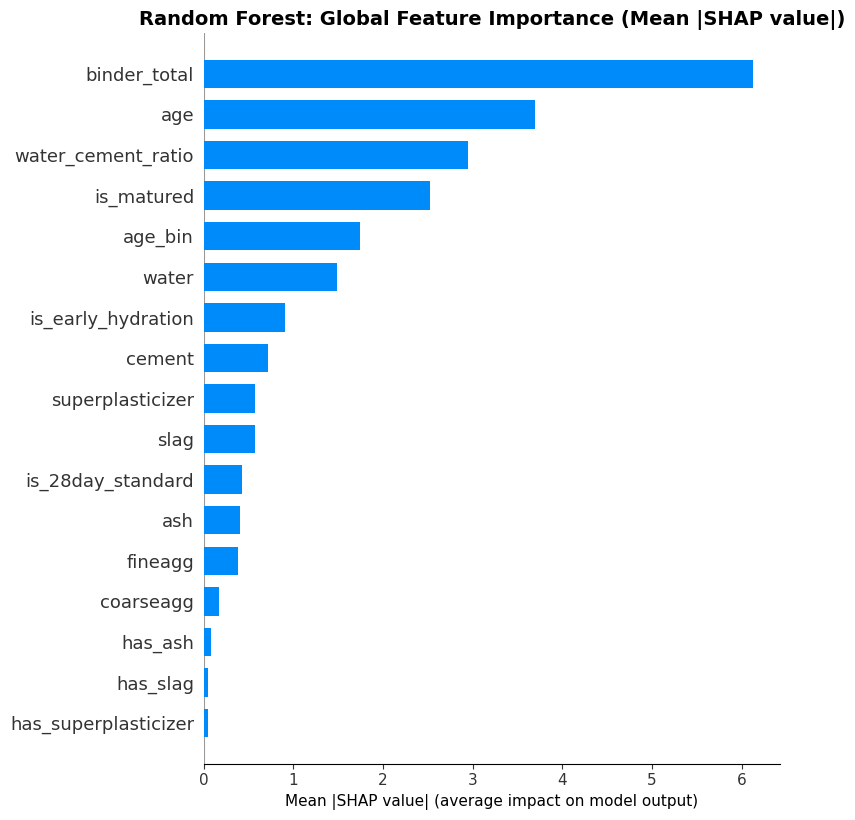


[Figure 2] Generating Random Forest SHAP summary plot (beeswarm)...


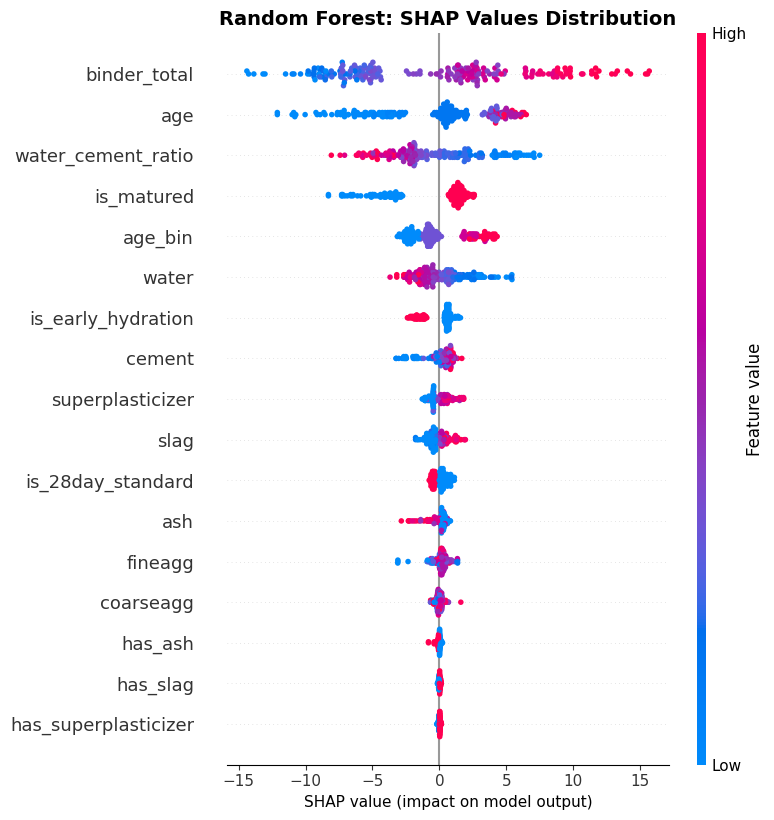


[Figure 3] Generating compact dot summary plot...


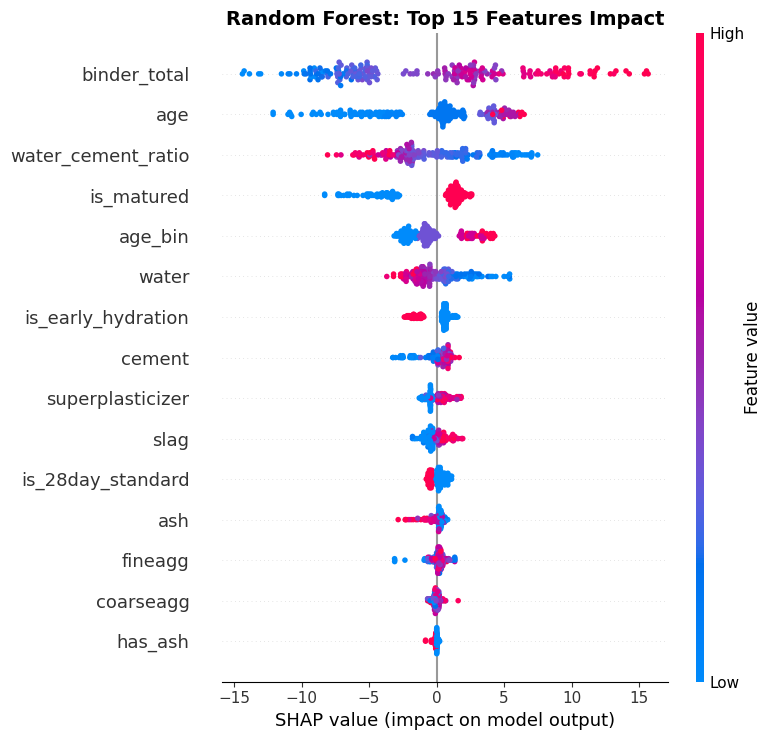

In [52]:
print("\n[Figure 1] Generating Random Forest global feature importance plot...")
plt.figure(figsize=(10, 6))
shap.summary_plot(rf_shap_values, X_test_with, plot_type="bar", show=False)
plt.title("Random Forest: Global Feature Importance (Mean |SHAP value|)", fontsize=14, fontweight='bold')
plt.xlabel("Mean |SHAP value| (average impact on model output)", fontsize=11)
plt.tight_layout()
plt.savefig('shap_rf_feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[Figure 2] Generating Random Forest SHAP summary plot (beeswarm)...")
plt.figure(figsize=(10, 8))
shap.summary_plot(rf_shap_values, X_test_with, show=False)
plt.title("Random Forest: SHAP Values Distribution", fontsize=14, fontweight='bold')
plt.xlabel("SHAP value (impact on model output)", fontsize=11)
plt.tight_layout()
plt.savefig('shap_rf_summary_beeswarm.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n[Figure 3] Generating compact dot summary plot...")
plt.figure(figsize=(12, 8))
shap.summary_plot(rf_shap_values, X_test_with, plot_type="dot", 
                  max_display=15, show=False)
plt.title("Random Forest: Top 15 Features Impact", 
          fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('shap_rf_dot_summary.png', dpi=300, bbox_inches='tight')
plt.show()
